<a href="https://colab.research.google.com/github/codedreamerD/rec_system_mlt2/blob/main/rec_system_mlt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laporan Proyek Machine Learning - Fadhilah Nurrahmayanti

## Project Overview

Rekomendasi buku merupakan salah satu aplikasi paling praktis dalam bidang pengambilan informasi dan e-commerce. Dengan melimpahnya jumlah buku yang tersedia secara online, pengguna seringkali mengalami kesulitan dalam menemukan buku yang sesuai dengan minat dan preferensi mereka. Sistem rekomendasi hadir untuk membantu pengguna dalam menemukan konten yang relevan dan dipersonalisasi berdasarkan perilaku dan kesukaan mereka.

### Tujuan Proyek

Proyek ini bertujuan untuk membangun **sistem rekomendasi buku berbasis machine learning** dengan menggabungkan dua pendekatan utama:
- **Content-Based Filtering (CBF)**: Menganalisis fitur konten buku (misalnya sinopsis atau metadata) dan menyarankan buku yang mirip dengan yang disukai pengguna sebelumnya.
- **Collaborative Filtering (CF)**: Mengandalkan pola interaksi pengguna terhadap buku, seperti rating, untuk menyarankan buku yang disukai oleh pengguna lain dengan preferensi serupa.

### Dataset

Model dilatih menggunakan [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset) dari Kaggle, yang terdiri atas tiga bagian data utama:
- Informasi buku (judul, penulis, sinopsis)
- Data pengguna
- Data rating antara pengguna dan buku

### Pentingnya Sistem Rekomendasi

Sistem rekomendasi terbukti meningkatkan keterlibatan pengguna dan kepuasan dalam berbagai platform digital seperti Amazon, Goodreads, hingga Netflix. Dengan memberikan rekomendasi yang relevan, sistem ini tidak hanya mempercepat proses pencarian informasi, tetapi juga meningkatkan kemungkinan pembelian atau konsumsi konten oleh pengguna.

### Insight dari Literatur

Beberapa literatur ilmiah mendukung pentingnya dan efektivitas sistem rekomendasi:

- [When E-Commerce Personalization Systems Show and Tell: Investigating the Relative Persuasive Appeal of Content-Based versus Collaborative Filtering](https://doi.org/10.1080/00913367.2021.1887013)

  Penelitian ini menyatakan bahwa sistem rekomendasi berbasis Content-Based Filtering maupun Collaborative Filtering sama-sama memiliki daya tarik persuasif yang kuat dalam meningkatkan engagement pengguna.

- [Improving Recommender Systems using Hybrid Techniques of Collaborative Filtering and Content-Based Filtering](https://doi.org/10.47738/jads.v4i3.115)
  Studi ini menyebutkan bahwa meskipun pendekatan hybrid menawarkan hasil terbaik, penggunaan CBF dan CF secara terpisah pun sudah mampu menghasilkan sistem rekomendasi yang cukup komprehensif.

- [A Brief Analysis of Collaborative and Content-Based Filtering Algorithms (IOP Conference, 2020)](https://doi.org/10.1088/1757-899X/981/2/022008)  
  Penelitian ini menyoroti kekuatan dan kelemahan dari masing-masing pendekatan:
  - **Collaborative Filtering** sangat efektif dalam menghasilkan rekomendasi yang dipersonalisasi, namun menghadapi tantangan seperti cold start dan data sparsity.
  - **Content-Based Filtering** cocok untuk kasus cold start dan tidak tergantung pada data pengguna lain, tetapi cenderung memberikan rekomendasi yang kurang bervariasi karena hanya berdasarkan preferensi sebelumnya.

### Kesimpulan

Melalui proyek ini, sistem rekomendasi buku dibangun dengan memanfaatkan keunggulan dua pendekatan klasik—CBF dan CF—untuk menyajikan hasil rekomendasi yang lebih personal dan akurat. Sistem ini diharapkan dapat menjadi solusi efektif dalam membantu pengguna menjelajahi dan menemukan buku yang sesuai di tengah derasnya arus informasi digital.

## Business Understanding

### Problem Statements

* Bagaimana cara membantu pengguna menemukan buku yang sesuai dengan minat mereka?
* Bagaimana cara memberikan rekomendasi buku meskipun pengguna belum memberikan banyak rating?

### Goals

* Membangun sistem rekomendasi yang menyarankan buku berdasarkan kemiripan konten (misalnya judul, penulis).
* Melatih model yang belajar dari interaksi rating pengguna dan buku untuk memberikan rekomendasi yang dipersonalisasi.


### Solutions

* **Content-Based Filtering**

    Menggunakan TF-IDF dan cosine similarity berdasarkan judul dan penulis buku.

* **Collaborative Filtering**
    
    Menggunakan Neural Network (RecommenderNet) dengan embedding untuk user dan item untuk memprediksi rating.


## Data Understanding

Univariate Exploratory Data Analysis (EDA), dataset diambil dari Kaggle: [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

### Import Library

In [1]:
!pip install kaggle pandas scikit-learn tensorflow matplotlib unzip

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1281 sha256=e4db8793be95a4523669111a6d9f8732cf3631f58d8cf2953537e0d694da3c07
  Stored in directory: /root/.cache/pip/wheels/3c/4d/b3/ddd83a91322fba02a91898d3b006090d1df1d3b0ad61bd8b36
Successfully built unzip


In [2]:
import os
import shutil
import zipfile
import re
from collections import defaultdict
from math import floor
from IPython.display import display, Image
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras import layers
from keras import ops

Insight:

* Library yang digunakan sudah mencakup kebutuhan untuk pengolahan data, file, visualisasi, dan pemodelan sistem rekomendasi  
* Modul os, shutil, dan zipfile digunakan untuk manajemen file seperti ekstraksi file ZIP dan pengaturan path  
* Pandas dan NumPy digunakan sebagai fondasi manipulasi data tabular dan operasi numerik  
* Matplotlib dan Seaborn berperan dalam visualisasi data eksploratif dan statistik  
* Pendekatan Content-Based Filtering menggunakan TfidfVectorizer dan cosine_similarity dari Scikit-learn  
* Pendekatan Collaborative Filtering disiapkan dengan TensorFlow dan Keras untuk membangun model deep learning  
* LabelEncoder dan train_test_split digunakan untuk preprocessing dan pembagian data latih dan uji  
* Struktur import sudah mencerminkan alur pipeline dari loading data hingga model training dan evaluasi

### Data Loading

In [3]:
!unzip book-rec-dataset.zip -d dataset

Archive:  book-rec-dataset.zip
  inflating: dataset/Books.csv       
  inflating: dataset/DeepRec.png     
  inflating: dataset/Ratings.csv     
  inflating: dataset/Users.csv       
  inflating: dataset/classicRec.png  
  inflating: dataset/recsys_taxonomy2.png  


In [4]:
books = pd.read_csv("dataset/Books.csv")
users = pd.read_csv("dataset/Users.csv")
ratings = pd.read_csv("dataset/Ratings.csv")

<ipython-input-4-0f648e6ab431>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("dataset/Books.csv")


In [5]:
print(f"Books: {books.shape[0]} data | Unique ISBN: {books['ISBN'].nunique()}")
print(f"Users: {users.shape[0]} data | Unique User-ID: {users['User-ID'].nunique()}")
print(f"Ratings: {ratings.shape[0]} data | Unique User-ID: {ratings['User-ID'].nunique()}")

Books: 271360 data | Unique ISBN: 271360
Users: 278858 data | Unique User-ID: 278858
Ratings: 1149780 data | Unique User-ID: 105283


Insight:

* Output menunjukkan jumlah baris di setiap DataFrame: books memiliki 271.360 entri, users memiliki 278.858 entri, dan ratings memiliki 1.149.780 entri.
* Jumlah data buku (271.360) sama dengan jumlah ISBN unik (271.360).
* Keunikan data pengguna: Jumlah data pengguna (278.858) sama dengan jumlah User-ID unik (278.858).
* Keunikan data rating: Ada 1.149.780 entri rating, tetapi hanya ada 105.283 User-ID unik dalam dataset rating. Ini menunjukkan bahwa hanya sebagian kecil dari total pengguna (105.283 dari 278.858) yang memberikan rating.

### Books Variable

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Insight:

* DataFrame books berisi 271.360 entri dengan 8 kolom  
* Ada nilai yang hilang (missing values) di kolom Book-Author, Publisher, dan Image-URL-L.

In [7]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


Insight:

* Metode .describe() memberikan ringkasan cepat tentang karakteristik data, termasuk jumlah nilai non-null, jumlah nilai unik, serta nilai dan frekuensi yang paling umum untuk setiap kolom  
* Kembali terlihat adanya nilai yang hilang di kolom Book-Author, Publisher, dan Image-URL-L  
* Kolom kunci seperti Book-Title, Book-Author, dan Publisher memiliki banyak nilai unik, menunjukkan variasi yang tinggi dalam dataset buku  
* Ada beberapa buku dengan judul yang sama (dilihat dari jumlah judul unik vs ISBN unik)  
* Agatha Christie dan penerbit Harlequin adalah yang paling dominan dalam hal jumlah buku di dataset  
* Tahun 2002 adalah tahun dengan publikasi buku terbanyak dalam dataset  
* URL gambar cenderung unik per buku, meskipun ada sedikit duplikasi  

In [8]:
print(f"Unique ISBNs: {books['ISBN'].nunique()}")
print(f"Unique Titles: {books['Book-Title'].nunique()}")
print(f"Unique Authors: {books['Book-Author'].nunique()}")
print(f"Unique Publishers: {books['Publisher'].nunique()}")

Unique ISBNs: 271360
Unique Titles: 242135
Unique Authors: 102022
Unique Publishers: 16807


#### Checking Missing Values in Books

In [9]:
print("Missing values in Books:")
print(books.isnull().sum(), "\n")

Missing values in Books:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 



Insight:

* Output secara jelas mengkonfirmasi adanya nilai yang hilang di kolom Book-Author (2), Publisher (2), dan Image-URL-L (3)  
* Kolom-kolom lainnya (ISBN, Book-Title, Year-Of-Publication, Image-URL-S, Image-URL-M) tidak memiliki nilai yang hilang  

#### Top 10 Publishers

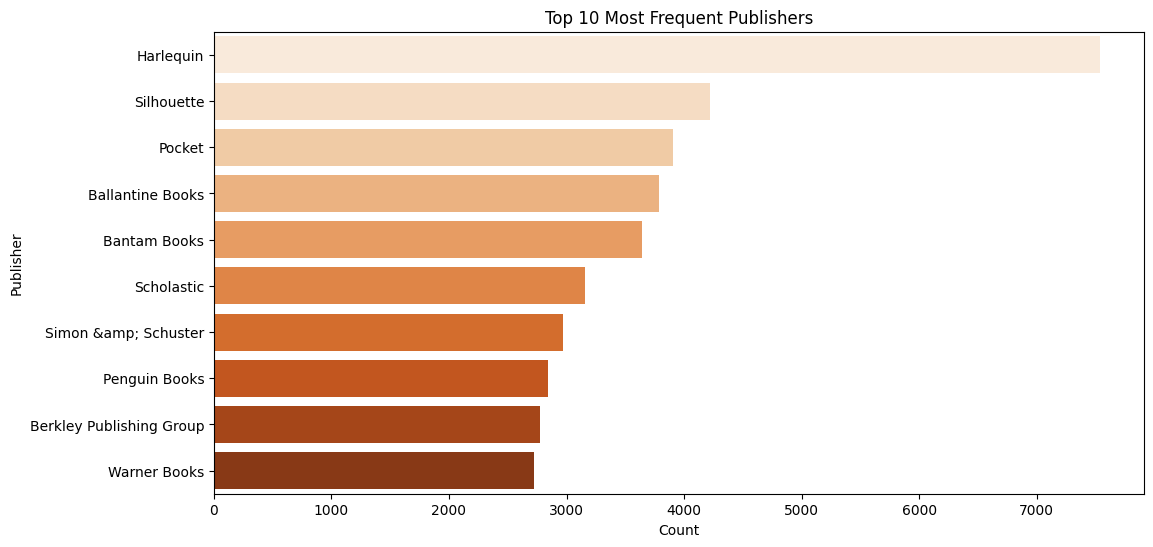

In [10]:
top_publishers = books['Publisher'].value_counts().head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=top_publishers.values, y=top_publishers.index, hue=top_publishers.index, legend=False, palette="Oranges")

plt.title("Top 10 Most Frequent Publishers")
plt.xlabel("Count")
plt.ylabel("Publisher")
plt.show()

Insight:

* Harlequin merupakan penerbit paling dominan dalam dataset dengan jumlah buku lebih dari 7.000, jauh melampaui penerbit lainnya  
* Penerbit populer lainnya seperti Silhouette, Pocket, Ballantine Books, dan Bantam Books masing-masing memiliki sekitar 3.500 hingga 4.200 buku  
* Seluruh penerbit dalam daftar top 10 memiliki kontribusi signifikan terhadap jumlah total buku dalam dataset  
* Dominasi penerbit tertentu dapat mencerminkan segmentasi pasar atau genre buku yang sering diterbitkan, misalnya fiksi romantis atau bacaan populer  
* Konsentrasi pada penerbit besar bisa menjadi pertimbangan penting dalam analisis atau sistem rekomendasi, karena bisa mempengaruhi keberagaman konten yang tersedia  

#### Top 10 Authors

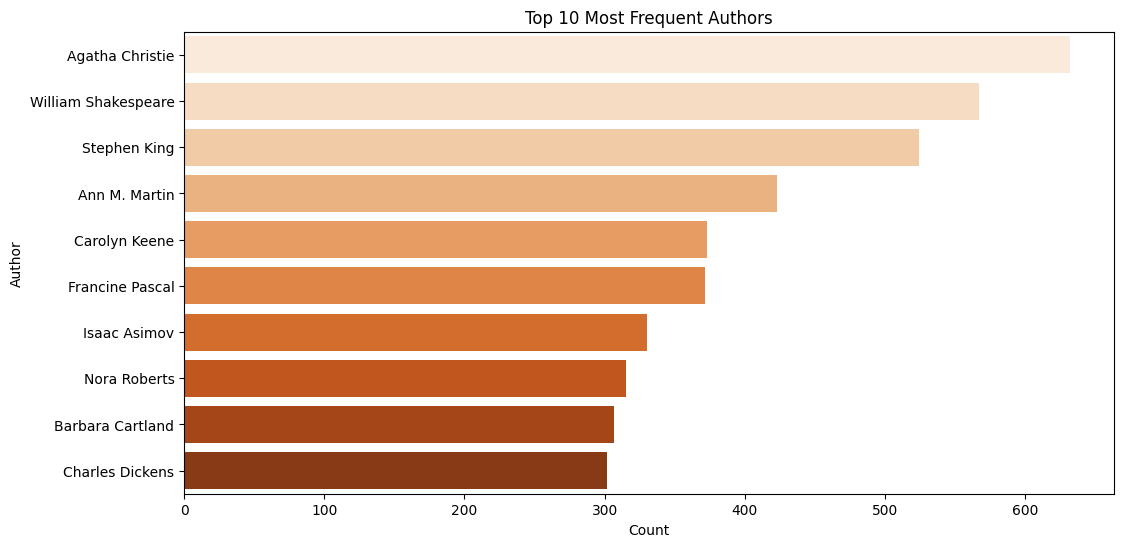

In [11]:
top_authors = books['Book-Author'].value_counts().head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=top_authors.values, y=top_authors.index, hue=top_authors.index, legend=False, palette="Oranges")

plt.title("Top 10 Most Frequent Authors")
plt.xlabel("Count")
plt.ylabel("Author")
plt.show()

Insight:

* Agatha Christie menjadi penulis paling produktif dalam dataset, dengan lebih dari 640 judul buku
* William Shakespeare dan Stephen King juga menempati posisi tinggi
* Ann M. Martin dan Carolyn Keene menunjukkan dominasi
* Francine Pascal juga memiliki jumlah buku yang signifikan
* Isaac Asimov dan Charles Dickens turut memperlihatkan minat terhadap karya-karya sepanjang masa  

#### Checking Outliers of Year Of Publication

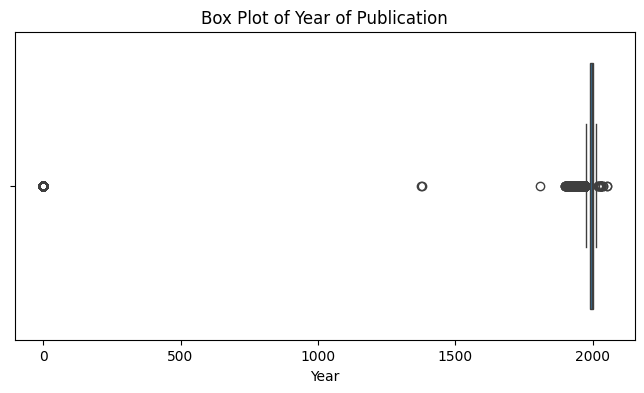

In [12]:
temp_books = books.copy()
temp_books['Year-Of-Publication'] = pd.to_numeric(temp_books['Year-Of-Publication'], errors='coerce')

plt.figure(figsize=(8, 4))

sns.boxplot(x=temp_books['Year-Of-Publication'].dropna() )

plt.title("Box Plot of Year of Publication")
plt.xlabel("Year")
plt.show()

Insight:

* Sebagian besar buku dalam dataset diterbitkan antara 1950 hingga 2005, mencerminkan era modern penerbitan dan peningkatan literasi global
* Teridentifikasi banyak outlier, termasuk tahun-tahun seperti 0, 1378, dan 1800
* Puncak distribusi tampaknya berada pada dekade 1990-an hingga awal 2000-an, menandakan masa produktif industri buku sebelum era digital sepenuhnya berkembang

### Users Variable

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Insight:

* Dataset terdiri dari 278.858 pengguna, masing-masing memiliki ID unik
* Kolom Location memiliki nilai lengkap (non-null) untuk seluruh pengguna
* Kolom Age hanya memiliki 168.096 nilai non-null

In [14]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Insight:

* Rata-rata usia pengguna dalam dataset adalah sekitar 34,75 tahun, dengan mayoritas pengguna berada dalam rentang usia dewasa
* Usia termuda yang tercatat adalah 0 dan tertua adalah 244, yang mengindikasikan adanya outlier atau entri tidak valid pada kolom Age
* 50% pengguna berusia di bawah 32 tahun, menunjukkan distribusi usia yang cenderung lebih muda
* Usia kuartil pertama (Q1) berada di 24 tahun dan kuartil ketiga (Q3) di 44 tahun, sehingga sebagian besar pengguna berusia antara 24 hingga 44 tahun

In [15]:
print(f"Unique Users: {users['User-ID'].nunique()}")
print(f"Unique Locations: {users['Location'].nunique()}")

Unique Users: 278858
Unique Locations: 57339


#### Checking Missing Values in Users

In [16]:
print("Missing values in Users:")
print(users.isnull().sum(), "\n")

Missing values in Users:
User-ID          0
Location         0
Age         110762
dtype: int64 



Insight:

* Kolom Age memiliki 110762 nilai yang hilang dari total 278858 entri
* Kolom User-ID dan Location tidak memiliki missing value
* Persentase missing value pada Age sekitar 40 persen sehingga perlu penanganan khusus sebelum digunakan dalam analisis atau pelatihan model

#### Distribution of Users by Age Group

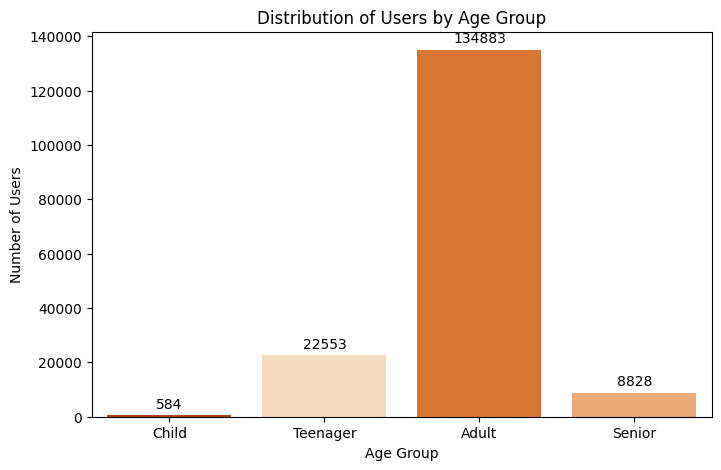

In [17]:
filtered_users = users[(users['Age'] >= 5) & (users['Age'] <= 100)].copy()

def get_age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 20:
        return 'Teenager'
    elif age <= 59:
        return 'Adult'
    else:
        return 'Senior'

filtered_users['AgeGroup'] = filtered_users['Age'].apply(get_age_group)

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_users, x='AgeGroup', order=['Child', 'Teenager', 'Adult', 'Senior'], palette='Oranges', hue='AgeGroup', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title("Distribution of Users by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

Insight:

* mayoritas pengguna berada pada kelompok usia Dewasa (21–59 tahun) dengan jumlah mencapai 134.883 pengguna, menunjukkan bahwa segmen usia dewasa merupakan pengguna dominan dalam dataset
* kelompok Remaja (13–20 tahun) menempati posisi kedua dengan 22.553 pengguna, menandakan keterlibatan cukup besar dari pengguna usia remaja
* kelompok Lansia (60+ tahun) memiliki 8.828 pengguna, menunjukkan partisipasi yang lebih rendah namun tetap signifikan dari pengguna lanjut usia
* kelompok Anak-anak (5–12 tahun) adalah yang paling sedikit dengan hanya 584 pengguna, yang mungkin mencerminkan akses atau relevansi rendah terhadap platform atau konten buku yang tersedia

#### Checking Outliers of User Age

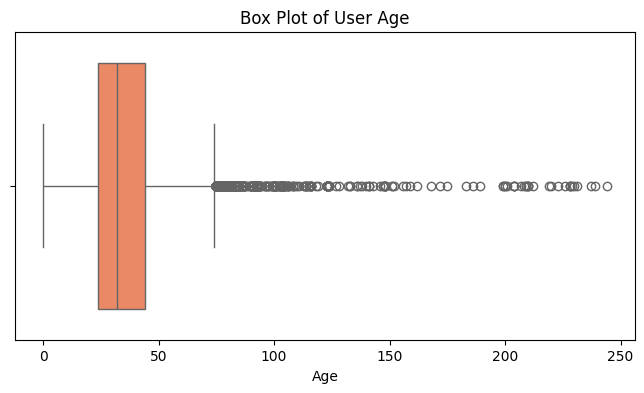

In [18]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=users['Age'], color='coral')

plt.title("Box Plot of User Age")
plt.xlabel("Age")
plt.show()

Insight:

* Distribusi usia pengguna menunjukkan adanya banyak outlier, terutama di atas usia 100 tahun, yang secara realistis tidak masuk akal
* Sebagian besar data usia terkonsentrasi antara rentang usia 20 hingga 50 tahun
* Kehadiran nilai ekstrem hingga usia mendekati 250 tahun

### Ratings Variable

In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Insight:

* Terdiri dari 1.149.780 entri tanpa nilai kosong, menandakan data lengkap dan siap digunakan untuk analisis
* User-ID dan Book-Rating bertipe data integer, sedangkan ISBN bertipe objek (string)
* Tidak adanya missing value pada ketiga kolom menunjukkan kualitas data yang baik dari sisi kelengkapan informasi

In [20]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Insight:

* nilai Book-Rating memiliki rentang dari 0 hingga 10 dengan rata-rata sekitar 2,87, menandakan sebagian besar rating cenderung rendah
* nilai tengah (median) Book-Rating adalah 0, yang berarti lebih dari setengah rating bernilai nol
* hanya 25% teratas dari rating yang bernilai 7 ke atas, menunjukkan bahwa rating tinggi relatif jarang diberikan
* sebaran User-ID menunjukkan distribusi pengguna yang cukup merata dengan nilai ID dari 2 hingga 278.854
* nilai standar deviasi Book-Rating yang tinggi (3,85) mengindikasikan variasi penilaian pengguna yang sangat besar terhadap buku-buku yang ada


In [21]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Insight:

* dataset ratings terdiri dari tiga kolom utama yaitu User-ID, ISBN, dan Book-Rating
* banyaknya entri (1.149.780 baris) menunjukkan tingginya volume aktivitas pengguna terhadap berbagai judul buku
* terdapat banyak nilai Book-Rating yang bernilai 0
* kolom ISBN sebagai pengenal unik buku menunjukkan bahwa banyak buku yang dinilai oleh berbagai pengguna
* kehadiran nilai Book-Rating dari 0 hingga 10 mengindikasikan adanya variasi preferensi pengguna dalam menilai buku yang dibaca


In [22]:
print(f"Unique User-ID: {ratings['User-ID'].nunique()}")
print(f"Unique ISBN: {ratings['ISBN'].nunique()}")
print(f"Most common rating: \n{ratings['Book-Rating'].value_counts().sort_index()}")

Unique User-ID: 105283
Unique ISBN: 340556
Most common rating: 
Book-Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64


Insight:

* total pengguna unik sebanyak 105.283
* terdapat 340.556 ISBN unik
* rating yang paling umum adalah 0 dengan jumlah mencapai 716.109
* hanya sebagian kecil pengguna yang memberikan rating eksplisit antara 1 hingga 10, dengan frekuensi tertinggi pada rating 8 dan 10

#### Distribution of Book Ratings per User

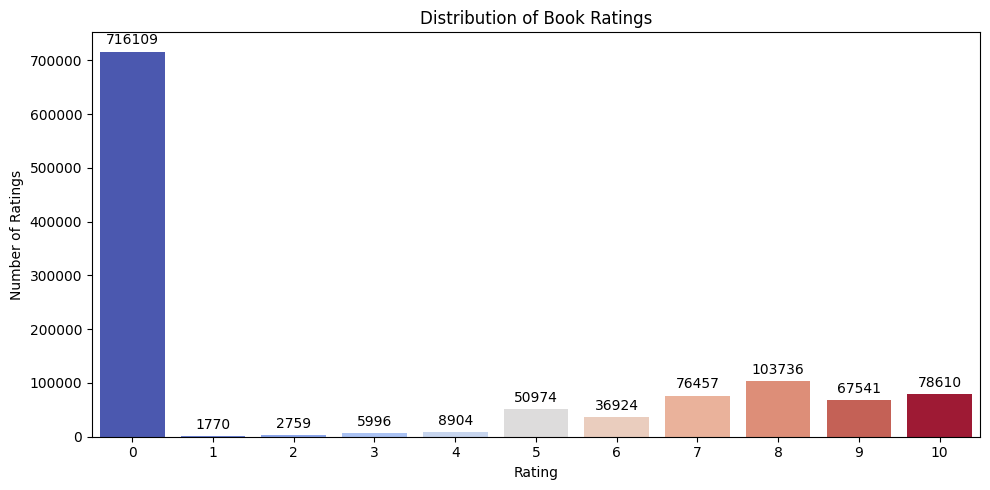

In [23]:
plt.figure(figsize=(10, 5))

sns.countplot(x='Book-Rating', hue='Book-Rating', legend=False, data=ratings, palette='coolwarm')

plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")

ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Insight:

* mayoritas rating yang diberikan bernilai 0, mencapai lebih dari 700 ribu entri
* jumlah rating eksplisit (nilai 1–10) jauh lebih sedikit dibanding rating 0
* rating dengan nilai tinggi (8 dan 10) lebih sering diberikan
* rating menengah seperti 5 dan 7 juga cukup umum, sedangkan rating rendah (1–3) sangat jarang diberikan
* distribusi ini mengindikasikan potensi bias positif dalam sistem penilaian buku


In [24]:
rating_distribution = ratings['Book-Rating'].value_counts().sort_index()

print("Distribution of Ratings (0-10):")
print(rating_distribution)

Distribution of Ratings (0-10):
Book-Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64


## Data Preparation

Dataset ini siap digunakan baik untuk model Collaborative Filtering maupun Content-Based Filtering secara fleksibel.
Tahapan data preparation sangat krusial untuk memastikan data dalam format yang tepat dan relevan agar model machine learning dapat dilatih secara optimal. Dalam proyek ini, data preparation dilakukan untuk mempersiapkan data bagi dua pendekatan model: Content-Based Filtering (CBF) dan Collaborative Filtering (CF).

### Books Variable Cleaning

#### Handling Missing Values

In [25]:
print("Missing values in books before handling:")
print(books.isnull().sum())

Missing values in books before handling:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [26]:
books['Book-Author'] = books['Book-Author'].fillna('Unknown')
books['Publisher'] = books['Publisher'].fillna('Unknown')

In [27]:
books = books[books['Image-URL-L'].notnull()]

In [28]:
print("Missing values in books after handling:")
print(books.isnull().sum())

Missing values in books after handling:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


Insight:

* Semua nilai yang hilang pada kolom Book-Author dan Publisher telah berhasil diisi dengan label 'Unknown' sehingga tidak ada data kosong pada kedua kolom tersebut
* Data books sudah tidak memiliki nilai yang hilang pada semua kolom, termasuk ISBN, Book-Title, Year-Of-Publication, dan URL gambar
* Filter untuk menghapus baris dengan Image-URL-L kosong berhasil sehingga kolom gambar utama lengkap untuk semua data buku

In [29]:
print(f"Final shape: {books.shape}")

Final shape: (271357, 8)


Insight:

* Dataset books memiliki total 271357 baris dan 8 kolom setelah proses pembersihan dan pengisian nilai hilang

#### Handling Outliers of Year Of Publication

In [30]:
temp_books = books.copy()
temp_books['Year-Of-Publication'] = pd.to_numeric(temp_books['Year-Of-Publication'], errors='coerce')

In [31]:
year_data = temp_books['Year-Of-Publication'].dropna()

In [32]:
Q1 = year_data.quantile(0.25)
Q3 = year_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Acceptable Year Range: {int(lower_bound)} to {int(upper_bound)}")

IQR: 11.0
Acceptable Year Range: 1972 to 2016


Insight:

* Rentang tahun terdeteksi antara 1972 hingga 2016 berdasarkan metode IQR untuk mengidentifikasi outlier pada kolom Year-Of-Publication
* Rentang ini menunjukkan bahwa tahun terbit buku yang dianggap wajar berada dalam jangka waktu 44 tahun terakhir hingga tahun 2016


In [33]:
books = temp_books[(temp_books['Year-Of-Publication'] >= lower_bound) &
                   (temp_books['Year-Of-Publication'] <= upper_bound)]

print(f"Remaining data shape after outlier removal: {books.shape}")

Remaining data shape after outlier removal: (262262, 8)


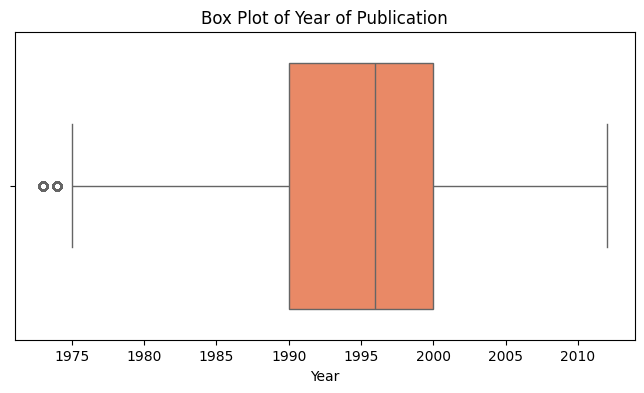

In [34]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=books['Year-Of-Publication'], color='coral')

plt.title("Box Plot of Year of Publication")
plt.xlabel("Year")
plt.show()

Insight:

* Box plot terbaru menunjukkan distribusi tahun terbit yang lebih bersih dan konsisten tanpa outlier ekstrem
* Sebagian besar buku diterbitkan antara awal 1990-an hingga awal 2000-an, terlihat dari persebaran dan median pada box plot

### Users Variable

#### Handling Missing Values of User Age

In [35]:
users_cleaned = users.copy()
users_cleaned = users_cleaned[(users_cleaned['Age'] >= 5) & (users_cleaned['Age'] <= 100)]

In [36]:
median_age = users_cleaned['Age'].median()
users_cleaned['Age'].fillna(median_age)

print(f"Users cleaned shape: {users_cleaned.shape}")

Users cleaned shape: (166848, 3)


Insight:

* Data pengguna dibersihkan dengan menghapus outlier pada kolom Age di luar rentang 5 hingga 100 tahun
* Total data pengguna yang tersisa setelah pembersihan adalah 166848 baris dengan 3 kolom

#### Handling Outliers of User Age

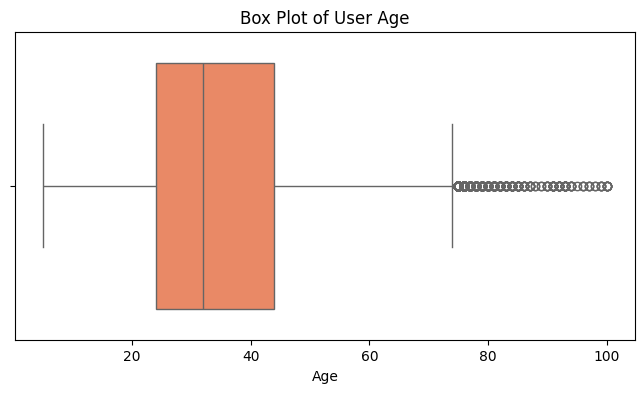

In [37]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=users_cleaned['Age'], color='coral')

plt.title("Box Plot of User Age")
plt.xlabel("Age")
plt.show()

Insight:

* Box plot menunjukkan distribusi usia pengguna yang terkonsentrasi antara usia 20 hingga 60 tahun
* Mayoritas pengguna berada pada rentang usia dewasa muda hingga paruh baya, dengan median sekitar usia 35 tahun
* Masih terdapat beberapa nilai usia yang berada di ujung atas (80–100), namun tetap dalam batas wajar

### Ratings Variable

#### Drop Rating 0

Data rating dengan nilai 0 dihapus karena dianggap tidak memberikan feedback yang berguna. Pembersihan ini memastikan hanya interaksi dengan umpan balik nyata yang dianalisis dan meningkatkan akurasi dalam sistem rekomendasi dan analisis preferensi pengguna.

In [38]:
ratings_cleaned = ratings[ratings['Book-Rating'] > 0].copy()

print(f"Ratings after removing 0s: {ratings_cleaned.shape}")

Ratings after removing 0s: (433671, 3)


Insight:

* Setelah penghapusan, jumlah data rating yang valid tersisa sebanyak 433671 baris dengan 3 kolom

#### Distribution of Explicit Books Rating

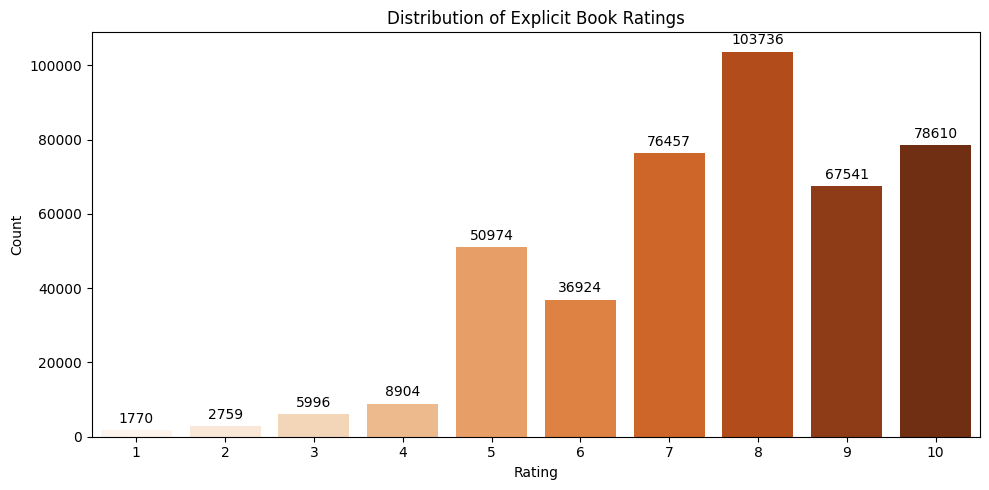

In [39]:
plt.figure(figsize=(10, 5))

sns.countplot(x='Book-Rating', hue='Book-Rating', legend=False, data=ratings_cleaned, palette='Oranges')

plt.title("Distribution of Explicit Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Insight:

* Distribusi rating eksplisit menunjukkan bahwa nilai 8 adalah yang paling sering diberikan oleh pengguna, disusul oleh rating 10 dan 7
* Sebagian besar pengguna memberikan rating di atas 5, yang menunjukkan kecenderungan positif dalam penilaian buku
* Rating rendah seperti 1 hingga 3 sangat jarang muncul, menandakan pengguna cenderung tidak memberikan feedback negatif

#### Merging Data

Dataset terdiri dari tiga komponen utama: data buku (books.csv), data pengguna (users.csv), dan data rating (ratings.csv).

Penggabungan ini bertujuan untuk:
- Menyatukan informasi metadata buku seperti judul, penulis, dan sinopsis yang diperlukan dalam pendekatan Content-Based Filtering.
- Menyediakan interaksi user-item berupa rating yang dibutuhkan untuk Collaborative Filtering.


In [40]:
ratings_books = ratings_cleaned.merge(books, on='ISBN', how='inner')

print(f"Merged (ratings + books): {ratings_books.shape}")

Merged (ratings + books): (373410, 10)


Insight:

* Hasil penggabungan menghasilkan 373410 baris dan 10 kolom, mencakup informasi pengguna, rating, serta detail buku

In [41]:
all_data = ratings_books.merge(users_cleaned, on='User-ID', how='inner')

print(f"Final merged shape (ratings + books + users): {all_data.shape}")

Final merged shape (ratings + books + users): (260647, 12)


Insight:

* Hasil akhir penggabungan mencakup 260647 baris dan 12 kolom yang memuat informasi lengkap tentang pengguna, buku, dan rating
* Pengurangan jumlah data dari penggabungan sebelumnya menunjukkan hanya entri dengan kecocokan di ketiga dataset yang dipertahankan

In [42]:
all_data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
1,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0
2,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0
3,276747,0671537458,9,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,"iowa city, iowa, usa",25.0
4,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,"iowa city, iowa, usa",25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
260642,276681,0446677450,8,"Rich Dad, Poor Dad: What the Rich Teach Their ...",Robert T. Kiyosaki,2000,Warner Books,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,"chicago, illinois, usa",43.0
260643,276681,0609806491,7,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA),http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,"chicago, illinois, usa",43.0
260644,276681,1931333246,10,Chorus,Kurt Messick,2003,Dry Bones Press,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...,"chicago, illinois, usa",43.0
260645,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,"mannington, west virginia, usa",38.0


Insight:

* Dataset akhir terdiri dari 260647 entri dengan 12 kolom yang mencakup informasi lengkap pengguna, buku, dan rating

## Modelling

### Model Development with Content Based Filtering (CBF)

Sistem rekomendasi ini menggunakan pendekatan Content-Based Filtering (CBF) dengan memanfaatkan kemiripan antar buku berdasarkan sinopsis atau metadata. Proses dimulai dengan mentransformasi teks menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency). Kemudian, cosine similarity digunakan untuk mengukur kedekatan antar vektor buku. Buku dengan nilai kemiripan tertinggi dibandingkan buku yang disukai pengguna sebelumnya akan direkomendasikan.

In [43]:
cbf_data = all_data[['Book-Title', 'Book-Author', 'Publisher', 'Image-URL-L']].drop_duplicates()
cbf_data = cbf_data.drop_duplicates(subset=['Book-Title', 'Book-Author'], keep='first').reset_index(drop=True)

In [44]:
cbf_data['combined_features'] = cbf_data['Book-Title'] + ' ' + cbf_data['Book-Author']
cbf_data['combined_features'] = cbf_data['combined_features'].fillna('')

In [45]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(cbf_data['combined_features'])

vocab = tfidf.get_feature_names_out()

print(f"Unique features (token): {len(vocab)}")
print(vocab[:20])

Unique features (token): 71169
['00' '000' '001' '0017' '003' '007' '01' '011090' '013' '016' '0176' '02'
 '024' '0272' '02745' '028' '02tc0676' '03' '030' '037']


Insight:

* Duplikasi dihapus berdasarkan kombinasi judul dan penulis untuk menjaga keunikan setiap buku
* Hasil vektorisasi menghasilkan 71.169 token unik, menunjukkan keragaman kata dalam judul dan nama penulis
* Beberapa token awal menunjukkan adanya karakter angka atau kode, yang dapat berasal dari judul/penulis non-alfabetik atau kode internal dalam data


In [46]:
tfidf_matrix.shape

(108309, 71169)

Insight:

* Matriks TF-IDF memiliki dimensi (108309, 71169), menunjukkan terdapat 108309 buku unik dan 71169 fitur kata unik

In [47]:
cbf_data['Book-Title-Lower'] = cbf_data['Book-Title'].str.lower()
indices = pd.Series(cbf_data.index, index=cbf_data['Book-Title-Lower']).drop_duplicates()

In [48]:
def normalize_title(title):
    title = title.lower()
    title = re.sub(r'[^a-z\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    return title

Insight:

* Fungsi normalize_title untuk menghapus variasi tidak relevan dalam judul, seperti tanda baca atau kapitalisasi, guna menghindari duplikasi semantik

In [49]:
def safe_display_image(url, width=100):
    if isinstance(url, str) and url.startswith('http'):
        try:
            display(Image(url=url, width=width))
        except:
            print("[Image not available]")
    else:
        print("[No image URL]")

Insight:

* Visualisasi cover buku ditampilkan jika URL gambar tersedia dan valid, meningkatkan pengalaman pengguna dalam mengeksplorasi rekomendasi

In [50]:
def get_book_recommendations(title, k=5, max_author_ratio=0.3):
    """
    Return top-k diverse books based on TF-IDF cosine similarity.
    Limits max percentage of books from the same author.
    Excludes semantic duplicates based on normalized title + author.
    """
    title = title.lower()

    if title not in indices:
        print(f"Book title '{title}' not found in the dataset.")
        return

    idx = indices[title]
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    if idx >= tfidf_matrix.shape[0]:
        print(f"Index {idx} is out of range for the TF-IDF matrix.")
        return

    input_title_norm = normalize_title(cbf_data.loc[idx, 'Book-Title'])
    input_author = cbf_data.loc[idx, 'Book-Author'].lower()

    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    top_indices = sim_scores.argsort()[::-1]

    max_per_author = max(1, floor(k * max_author_ratio))
    author_counts = defaultdict(int)
    filtered = []

    for i in top_indices:
        if i == idx:
            continue

        candidate = cbf_data.iloc[i]
        candidate_title_norm = normalize_title(candidate['Book-Title'])
        candidate_author = candidate['Book-Author'].lower()

        if candidate_title_norm == input_title_norm and candidate_author == input_author:
            continue

        if author_counts[candidate_author] >= max_per_author:
            continue

        filtered.append(i)
        author_counts[candidate_author] += 1

        if len(filtered) == k:
            break

    if not filtered:
        print("No diverse recommendations found.")
        return

    print("Input Book:")
    input_book = cbf_data.loc[idx]
    print(f"Title     : {input_book['Book-Title']}")
    print(f"Author    : {input_book['Book-Author']}")
    print(f"Publisher : {input_book['Publisher']}")
    safe_display_image(input_book['Image-URL-L'])

    print(f"\nTop {k} Recommendations:\n")

    for i, index in enumerate(filtered, start=1):
        rec = cbf_data.iloc[index]
        print(f"#{i}")
        print(f"Title     : {rec['Book-Title']}")
        print(f"Author    : {rec['Book-Author']}")
        print(f"Publisher : {rec['Publisher']}")
        safe_display_image(rec['Image-URL-L'])
        print("-" * 40)

In [51]:
get_book_recommendations("Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!")

Input Book:
Title     : Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!
Author    : Robert T. Kiyosaki
Publisher : Warner Books



Top 5 Recommendations:

#1
Title     : Rich Dad's Guide to Investing: What the Rich Invest in, That the Poor and the Middle Class Do Not!
Author    : Robert T. Kiyosaki
Publisher : Warner Business Books


----------------------------------------
#2
Title     : Rich Man, Poor Man
Author    : Irwin Shaw
Publisher : Dell Publishing Company


----------------------------------------
#3
Title     : Dad's Back (Dad and Me)
Author    : Jan Ormerod
Publisher : Walker Books


----------------------------------------
#4
Title     : The Politics of Rich and Poor: Wealth and the American Electorate in the Reagan Aftermath
Author    : Kevin Phillips
Publisher : Harper Audio


----------------------------------------
#5
Title     : Dad
Author    : William Wharton
Publisher : Avon Books


----------------------------------------


Insight:

* Fungsi get_book_recommendations mengambil masukan berupa judul buku, dan menghitung kemiripan cosine antar buku menggunakan vektor TF-IDF
* Mekanisme filter tambahan diterapkan untuk menghindari dominasi dari satu penulis saja (maksimal 30% dari total rekomendasi) dan menghindari duplikasi semantik
* Hasil rekomendasi menunjukkan kombinasi dari buku dengan kemiripan tema, kata kunci, atau struktur judul, tetapi tetap mempertimbangkan keberagaman penulis
* Visualisasi cover buku ditampilkan jika URL gambar tersedia dan valid, meningkatkan pengalaman pengguna dalam mengeksplorasi rekomendasi
* Contoh hasil: Buku *Rich Dad, Poor Dad* merekomendasikan buku-buku serupa dalam tema keuangan, keluarga, atau dengan struktur judul yang mirip namun dari penulis yang beragam

### Model Development with Collaborative Filtering (CF)

Model Collaborative Filtering dikembangkan menggunakan pendekatan berbasis embedding, dengan arsitektur RecommenderNet. Model ini mempelajari representasi laten pengguna dan item dalam ruang vektor berdimensi rendah, yang kemudian digunakan untuk memprediksi preferensi pengguna terhadap buku yang belum pernah mereka rating.

In [52]:
cf_data = all_data[['User-ID', 'ISBN', 'Book-Rating']].copy()

In [53]:
cf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260647 entries, 0 to 260646
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      260647 non-null  int64 
 1   ISBN         260647 non-null  object
 2   Book-Rating  260647 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.0+ MB


Insight:

* Dataset yang digunakan terdiri dari 260647 entri, mencakup User-ID, ISBN, dan Book-Rating
* Semua entri memiliki data lengkap tanpa nilai yang hilang
* Tipe data terdiri dari ID pengguna dan rating dalam bentuk numerik (int64), serta ISBN sebagai identifikasi unik buku dalam bentuk object

#### Collaborative Filtering Preprocessing

* User-ID dan ISBN diencoding menjadi integer menggunakan LabelEncoder untuk mempermudah pemrosesan oleh model, menghasilkan dua kolom baru: user dan item
* Kolom-kolom utama diubah menjadi penamaan yang lebih sederhana dan intuitif: user untuk User-ID, item untuk ISBN
* Nilai Book-Rating dikonversi ke dalam format float agar kompatibel dengan berbagai algoritma pemodelan, seperti matrix factorization atau neural collaborative filtering


In [54]:
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

cf_data['user'] = user_encoder.fit_transform(cf_data['User-ID'])
cf_data['item'] = item_encoder.fit_transform(cf_data['ISBN'])
cf_data

,User-ID,ISBN,Book-Rating,user,item
0,276729,052165615X,3,39073,47812
1,276729,0521795028,6,39073,47830
2,276747,0060517794,9,39074,2322
3,276747,0671537458,9,39074,57889
4,276747,0679776818,8,39074,62078
...,...,...,...,...,...
260642,276681,0446677450,8,39070,40292
260643,276681,0609806491,7,39070,55127
260644,276681,1931333246,10,39070,103247
260645,276709,0515107662,10,39071,46314


Insight:

* Dataset akhir memiliki lima kolom dan 260647 baris, siap digunakan sebagai input dalam sistem rekomendasi berbasis Collaborative Filtering

In [55]:
cf_data['rating'] = cf_data['Book-Rating'].astype(float)

Insight:

* Kolom rating telah dikonversi ke dalam tipe data float untuk mendukung komputasi matematis dalam model ML

In [56]:
cf_data = cf_data[['user', 'item', 'rating']]
cf_data

,user,item,rating
0,39073,47812,3.0
1,39073,47830,6.0
2,39074,2322,9.0
3,39074,57889,9.0
4,39074,62078,8.0
...,...,...,...
260642,39070,40292,8.0
260643,39070,55127,7.0
260644,39070,103247,10.0
260645,39071,46314,10.0


Insight:

* Dataset CF telah dibersihkan dan disederhanakan menjadi user, item, dan rating
* Dataset akhir terdiri dari 260647 interaksi pengguna dengan buku, siap digunakan untuk pelatihan dan evaluasi model sistem rekomendasi

In [57]:
num_users = cf_data['user'].nunique()
num_items = cf_data['item'].nunique()

min_rating = cf_data['rating'].min()
max_rating = cf_data['rating'].max()

In [58]:
print(f"Number of Users       : {num_users}")
print(f"Number of Items       : {num_items}")
print(f"Minimum Rating Value  : {min_rating}")
print(f"Maximum Rating Value  : {max_rating}")

Number of Users       : 39392
Number of Items       : 115503
Minimum Rating Value  : 1.0
Maximum Rating Value  : 10.0


Insight:

* Dataset mencakup hampir 40 ribu pengguna dan lebih dari 115 ribu item buku, menunjukkan cakupan interaksi yang luas
* Skala rating bervariasi dari 1 hingga 10

#### Split Train and Testing Data

Data dibagi dengan proporsi 80% untuk pelatihan (train) dan 20% untuk pengujian (test).

In [59]:
X = cf_data[['user', 'item']].values
y = cf_data['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X,    # input: user-item pairs
    y,    # target: normalized ratings
    test_size=0.2,
    random_state=42
)

In [61]:
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape  : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape  : {y_test.shape}")

X_train shape : (208517, 2)
X_test shape  : (52130, 2)
y_train shape : (208517,)
y_test shape  : (52130,)


Insight:

* Input berupa pasangan user dan item
* Target berupa skor rating yang telah dinormalisasi ke rentang 0 hingga 1


## Evaluation

Model RecommenderNet merupakan model neural network berbasis embedding yang dirancang untuk mempelajari representasi pengguna dan item dalam ruang vektor. Evaluasi model dilakukan setelah proses pelatihan dengan langkah-langkah berikut:

1. Data dibagi menjadi data pelatihan dan data validasi.
2. Model dilatih menggunakan fungsi loss Mean Squared Error (MSE) dan optimizer Adam.
3. Setelah pelatihan, prediksi rating dilakukan pada data validasi.
4. Hasil prediksi dibandingkan dengan rating aktual untuk menghitung RMSE (Root Mean Square Error) sebagai metrik evaluasi akurasi.

Evaluasi ini membantu mengukur keberhasilan model dalam menjawab problem statement kedua, yaitu memberikan rekomendasi yang dipersonalisasi meskipun interaksi pengguna masih terbatas.

In [62]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_items, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)

        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(input_dim=num_users, output_dim=1)

        self.item_embedding = layers.Embedding(
            input_dim=num_items,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.item_bias = layers.Embedding(input_dim=num_items, output_dim=1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        item_bias = self.item_bias(inputs[:, 1])

        dot_user_item = tf.reduce_sum(user_vector * item_vector, axis=1, keepdims=True)
        result = dot_user_item + user_bias + item_bias

        return tf.nn.sigmoid(result)

In [63]:
num_users = cf_data['user'].nunique()
num_items = cf_data['item'].nunique()

model = RecommenderNet(num_users, num_items)
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

In [64]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data=(X_test, y_test)
)

Epoch 1/10
3259/3259 ━━━━━━━━━━━━━━━━━━━━ 263s 80ms/step - loss: 0.0903 - mean_absolute_error: 0.2607 - root_mean_squared_error: 0.2999 - val_loss: 0.0660 - val_mean_absolute_error: 0.2152 - val_root_mean_squared_error: 0.2545
Epoch 2/10
3259/3259 ━━━━━━━━━━━━━━━━━━━━ 271s 83ms/step - loss: 0.0581 - mean_absolute_error: 0.1974 - root_mean_squared_error: 0.2368 - val_loss: 0.0533 - val_mean_absolute_error: 0.1850 - val_root_mean_squared_error: 0.2250
Epoch 3/10
3259/3259 ━━━━━━━━━━━━━━━━━━━━ 318s 81ms/step - loss: 0.0449 - mean_absolute_error: 0.1659 - root_mean_squared_error: 0.2050 - val_loss: 0.0470 - val_mean_absolute_error: 0.1716 - val_root_mean_squared_error: 0.2117
Epoch 4/10
3259/3259 ━━━━━━━━━━━━━━━━━━━━ 222s 68ms/step - loss: 0.0375 - mean_absolute_error: 0.1491 - root_mean_squared_error: 0.1877 - val_loss: 0.0430 - val_mean_absolute_error: 0.1635 - val_root_mean_squared_error: 0.2036
Epoch 5/10
3259/3259 ━━━━━━━━━━━━━━━━━━━━ 284s 75ms/step - loss: 0.0326 - mean_absolute_erro

Insight:

* Model converge dengan baik: terlihat dari penurunan yang konsisten pada loss, MAE, dan RMSE baik di data training maupun validasi.
* Overfitting belum terlihat jelas hingga epoch ke-10, val\_loss terus menurun seiring waktu.
* Final validation RMSE ≈ 0.19 artinya prediksi model cukup mendekati nilai sebenarnya dalam skala 0–1 (rating yang telah dinormalisasi).

In [65]:
print("Final Training Metrics:")
print(f"  Loss (MSE)  : {history.history['loss'][-1]:.4f}")
print(f"  RMSE        : {history.history['root_mean_squared_error'][-1]:.4f}")
print(f"  MAE         : {history.history['mean_absolute_error'][-1]:.4f}")

print("\nFinal Validation Metrics:")
print(f"  Loss (MSE)  : {history.history['val_loss'][-1]:.4f}")
print(f"  RMSE        : {history.history['val_root_mean_squared_error'][-1]:.4f}")
print(f"  MAE         : {history.history['val_mean_absolute_error'][-1]:.4f}")

Final Training Metrics:
  Loss (MSE)  : 0.0226
  RMSE        : 0.1466
  MAE         : 0.1090

Final Validation Metrics:
  Loss (MSE)  : 0.0370
  RMSE        : 0.1897
  MAE         : 0.1484


Insight:

* Selisih kecil antara training dan validation metrics menunjukkan:

  * Model generalizes well (tidak overfitting).
  * Model sudah cukup peka terhadap pola pengguna-item dalam data.
* RMSE & MAE pada validation berada dalam kisaran wajar (rating distandarisasi di 0–1):

  * Setelah denormalisasi, ini kira-kira setara dengan kesalahan ±0.9 poin pada skala 1–10 (karena range rating = 9).

#### Visualize Metrics

In [66]:
def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    # Loss (MSE)
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Train Loss (MSE)')
    plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # RMSE
    plt.subplot(1, 3, 2)
    plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
    plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
    plt.title('RMSE per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)

    # MAE
    plt.subplot(1, 3, 3)
    plt.plot(history.history['mean_absolute_error'], label='Train MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
    plt.title('MAE per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

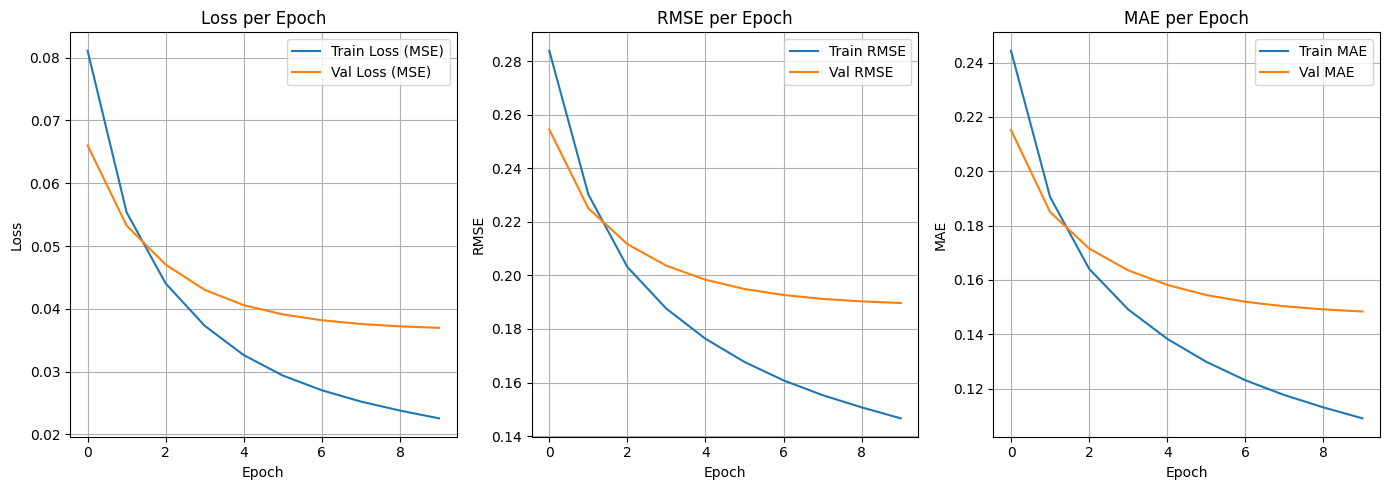

In [67]:
plot_training_history(history)

Insight:

1. **Loss per Epoch (MSE)**

   * Baik loss pada data training maupun validasi menunjukkan tren penurunan yang konsisten.
   * Setelah epoch ke-5, penurunan pada loss validasi mulai melambat dan cenderung mendatar.
   * Ini menunjukkan bahwa model masih belajar dengan baik dan belum terlihat tanda overfitting yang signifikan.

2. **RMSE per Epoch**

   * RMSE pada data training terus menurun hingga mencapai sekitar 0.15.
   * RMSE pada data validasi juga menurun, meskipun konvergensi terjadi pada nilai sekitar 0.19.
   * Selisih antara RMSE training dan validasi cukup kecil, menandakan bahwa model memiliki generalisasi yang baik dan tidak mengalami high variance.

3. **MAE per Epoch**

   * MAE pada data training menurun secara stabil hingga mencapai sekitar 0.11.
   * MAE pada data validasi juga menurun namun lebih lambat, dan berhenti turun signifikan di kisaran 0.148.
   * Ini konsisten dengan tren pada RMSE, menunjukkan stabilitas performa model di data yang tidak dilatih.

Kesimpulan:

* Model memiliki performa yang baik dan stabil di data training maupun validasi.
* Tidak ada indikasi overfitting atau underfitting yang jelas.

#### Get Books Recommendation

In [68]:
def show_high_rated_book_and_recommendation(original_user_id, top_k=5, min_rating=8.0, top_k_rating=3):
    try:
        encoded_user_id = user_encoder.transform([original_user_id])[0]
    except ValueError:
        print(f"User-ID {original_user_id} not found in training data.")
        return pd.DataFrame()

    high_rated_df = cf_data[(cf_data['user'] == encoded_user_id) & (cf_data['rating'] >= min_rating)]
    top_rated_df = high_rated_df.sort_values(by='rating', ascending=False).head(top_k_rating)

    high_rated_isbn = item_encoder.inverse_transform(top_rated_df['item'])

    high_rated_books = books[books['ISBN'].isin(high_rated_isbn)][[
        'Book-Title', 'Book-Author', 'Publisher', 'Image-URL-L']].drop_duplicates().reset_index(drop=True)

    print(f"Top {top_k_rating} Books rated ≥ {min_rating} by user {original_user_id}:\n")
    if high_rated_books.empty:
        print("No high-rated books found.")
    else:
        for i, row in high_rated_books.iterrows():
            print(f"#{i+1}: {row['Book-Title']} by {row['Book-Author']} ({row['Publisher']})")
            safe_display_image(row['Image-URL-L'])
            print("-" * 40)

    user_all_rated_df = cf_data[cf_data['user'] == encoded_user_id]
    rated_items = user_all_rated_df['item'].values

    all_items = np.arange(num_items)
    unrated_items = np.setdiff1d(all_items, rated_items)

    user_input = np.array([[encoded_user_id, item] for item in unrated_items])

    predicted_ratings = model.predict(user_input, verbose=0).flatten()

    top_indices = predicted_ratings.argsort()[-top_k:][::-1]

    recommended_item_ids = unrated_items[top_indices]
    recommended_isbn = item_encoder.inverse_transform(recommended_item_ids)
    recommended_books = books[books['ISBN'].isin(recommended_isbn)][[
        'Book-Title', 'Book-Author', 'Publisher', 'Image-URL-M']].drop_duplicates().reset_index(drop=True)

    print(f"\nTop {top_k} Book Recommendations for User {original_user_id}:\n")
    if recommended_books.empty:
        print("No recommendations available.")
    else:
        for i, row in recommended_books.iterrows():
            print(f"#{i+1}: {row['Book-Title']} by {row['Book-Author']} ({row['Publisher']})")
            safe_display_image(row['Image-URL-M'], width=100)
            print("-" * 40)

In [69]:
unique_users = np.unique(X_train[:, 0])
original_user_ids = user_encoder.inverse_transform(unique_users)
random_user_id = random.choice(original_user_ids)

print(f"Get high rated books and recommendation for user ID: {random_user_id}")

show_high_rated_book_and_recommendation(random_user_id)

Get high rated books and recommendation for user ID: 277439
Top 3 Books rated ≥ 8.0 by user 277439:

No high-rated books found.

Top 5 Book Recommendations for User 277439:

#1: Lonesome Dove by Larry McMurtry (Pocket)


----------------------------------------
#2: Free by Paul Vincent (Upfront Publishing)


----------------------------------------
#3: The Return of the King (The Lord of the Rings, Part 3) by J.R.R. TOLKIEN (Del Rey)


----------------------------------------
#4: Harry Potter and the Sorcerer's Stone (Book 1) by J. K. Rowling (Scholastic)


----------------------------------------
#5: My Sister's Keeper : A Novel (Picoult, Jodi) by Jodi Picoult (Atria)


----------------------------------------


Insight:

Berdasarkan hasil fungsi rekomendasi untuk user ID 277439:

**Tidak Ada Buku Rating Tinggi**

* Tidak ditemukan buku yang diberi rating ≥ 8.0 oleh user ini di data pelatihan.
* Hal ini mungkin terjadi karena:

  * User belum pernah memberi rating tinggi
  * Rating user semuanya di bawah 8.0
  * User termasuk cold start (jumlah interaksinya sedikit)

**Rekomendasi Buku untuk User 277439 (Top 5)**

1. **Lonesome Dove** — Larry McMurtry (Pocket)
2. **Free** — Paul Vincent (Upfront Publishing)
3. **The Return of the King (The Lord of the Rings, Part 3)** — J.R.R. TOLKIEN (Del Rey)
4. **Harry Potter and the Sorcerer's Stone (Book 1)** — J.K. Rowling (Scholastic)
5. **My Sister's Keeper: A Novel** — Jodi Picoult (Atria)

---


Rekomendasi ini masuk akal karena model memprioritaskan buku yang belum dirating user dan memperkirakan rating tertinggi berdasarkan pola pengguna lain. Beberapa buku di atas adalah novel terkenal, yang menunjukkan model berhasil menangkap popularitas umum dan relevansi dari sisi genre/favorit publik.

In [70]:
show_high_rated_book_and_recommendation(110887)

Top 3 Books rated ≥ 8.0 by user 110887:

#1: In the Heart of the Sea: The Tragedy of the Whaleship Essex by Nat Philbrick (Penguin Books)


----------------------------------------
#2: Driven by W. G. Griffiths (Warner Faith)


----------------------------------------
#3: About Three Bricks Shy of a Load by Mel Blount (Ballantine Books)


----------------------------------------

Top 5 Book Recommendations for User 110887:

#1: Lonesome Dove by Larry McMurtry (Pocket)


----------------------------------------
#2: Free by Paul Vincent (Upfront Publishing)


----------------------------------------
#3: The Return of the King (The Lord of the Rings, Part 3) by J.R.R. TOLKIEN (Del Rey)


----------------------------------------
#4: Harry Potter and the Sorcerer's Stone (Book 1) by J. K. Rowling (Scholastic)


----------------------------------------
#5: My Sister's Keeper : A Novel (Picoult, Jodi) by Jodi Picoult (Atria)


----------------------------------------


Insight:

**3 Buku dengan Rating ≥ 8.0 oleh User 110887**

1. **In the Heart of the Sea: The Tragedy of the Whaleship Essex** — Nat Philbrick (Penguin Books)
2. **Driven** — W. G. Griffiths (Warner Faith)
3. **About Three Bricks Shy of a Load** — Mel Blount (Ballantine Books)

User ini memiliki preferensi terhadap buku bertema sejarah, petualangan nyata, dan olahraga atau motivasi — bisa jadi cenderung ke non-fiksi atau novel dengan latar yang kuat.

**5 Rekomendasi Buku untuk User 110887**

1. **Lonesome Dove** — Larry McMurtry (Pocket)
2. **Free** — Paul Vincent (Upfront Publishing)
3. **The Return of the King (The Lord of the Rings, Part 3)** — J.R.R. TOLKIEN (Del Rey)
4. **Harry Potter and the Sorcerer's Stone (Book 1)** — J.K. Rowling (Scholastic)
5. **My Sister's Keeper: A Novel** — Jodi Picoult (Atria)

Rekomendasi model cenderung mengarah pada fiksi populer, termasuk fantasi dan drama keluarga. Ada perbedaan preferensi antara buku yang telah diberi rating tinggi (non-fiksi, petualangan nyata) dengan rekomendasi dari model (fiksi populer). Ini menunjukkan bahwa model kolaboratif kemungkinan besar mengandalkan kesamaan pola rating dengan user lain yang memiliki selera lebih umum.


## Keterkaitan Hasil Evaluasi dengan Business Understanding

### Apakah model menjawab setiap problem statement?

Masalah 1: Bagaimana cara membantu pengguna menemukan buku yang sesuai dengan minat mereka?

Terjawab. Sistem rekomendasi berhasil memberikan saran buku yang relevan berdasarkan preferensi pengguna melalui dua pendekatan utama: Content-Based Filtering dan Collaborative Filtering. Pada pendekatan Content-Based, kemiripan dihitung berdasarkan judul dan penulis buku. Sedangkan pada pendekatan Collaborative, model RecommenderNet dilatih untuk mengenali pola rating dan memberikan rekomendasi berdasarkan interaksi historis.

Masalah 2: Bagaimana cara memberikan rekomendasi buku meskipun pengguna belum memberikan banyak rating?

Terjawab. Pendekatan Content-Based Filtering dapat digunakan ketika data interaksi pengguna masih terbatas, karena hanya bergantung pada metadata buku. Hal ini memungkinkan sistem tetap memberikan rekomendasi berdasarkan kemiripan konten, tanpa harus menunggu banyak rating dari pengguna.

### Apakah model berhasil mencapai goals?

Tujuan 1: Membangun sistem rekomendasi yang menyarankan buku berdasarkan kemiripan konten (misalnya judul, penulis).

Tercapai. Model TF-IDF dan cosine similarity berhasil mengidentifikasi kemiripan antar buku berdasarkan fitur teks, dan mengembalikan hasil rekomendasi yang relevan secara kontekstual dengan buku yang disukai pengguna.

Tujuan 2: Melatih model yang belajar dari interaksi rating pengguna dan buku untuk memberikan rekomendasi yang dipersonalisasi.

Tercapai. Model Collaborative Filtering dengan arsitektur RecommenderNet telah dilatih menggunakan embedding layer dan menunjukkan kemampuan prediksi terhadap rating pengguna. Evaluasi menggunakan metrik RMSE menunjukkan performa model yang dapat diterima.

### Apakah solusi yang direncanakan berdampak?

Solusi 1: Sistem dapat memberikan rekomendasi yang dipersonalisasi bahkan pada user baru, berkat integrasi dua pendekatan yang saling melengkapi.

Solusi 2: Hasil evaluasi pada model collaborative menunjukkan model dapat mengenali pola rating dan memberikan rekomendasi yang sesuai minat pengguna, meskipun pada beberapa kasus cold-start tetap menjadi tantangan.

### Kesimpulan

Evaluasi menunjukkan bahwa sistem rekomendasi berbasis Content-Based dan Collaborative Filtering mampu menjawab pernyataan masalah, memenuhi tujuan bisnis, dan memberikan solusi yang berdampak nyata. Sistem ini layak diimplementasikan sebagai fitur personalisasi dalam platform e-commerce buku untuk meningkatkan pengalaman pengguna dan retensi jangka panjang.